In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
customers.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,10-07-2022
1,C0002,Elizabeth Lutz,Asia,13-02-2022
2,C0003,Michael Rivera,South America,07-03-2024
3,C0004,Kathleen Rodriguez,South America,09-10-2022
4,C0005,Laura Weber,Asia,15-08-2022
5,C0006,Brittany Palmer,South America,07-01-2024
6,C0007,Paul Graves,Asia,18-06-2022
7,C0008,David Li,North America,13-01-2024
8,C0009,Joy Clark,Europe,14-08-2023
9,C0010,Aaron Cox,Europe,15-12-2022


In [5]:
transactions.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68
5,T00442,C0188,P067,26-12-2024 14:40,1,300.68,300.68
6,T00490,C0195,P067,24-11-2024 11:49,3,902.04,300.68
7,T00536,C0008,P067,22-09-2024 06:13,1,300.68,300.68
8,T00564,C0157,P067,07-12-2024 17:57,3,902.04,300.68
9,T00631,C0130,P067,14-05-2024 23:14,2,601.36,300.68


In [6]:
products.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [7]:
print("Customers shape",customers.shape)
print("Products shape",products.shape)
print("transactions shape",transactions.shape)


Customers shape (200, 4)
Products shape (100, 4)
transactions shape (1000, 7)


In [8]:
print(customers.isnull().sum())
print("--"*10)
print(products.isnull().sum())
print("--"*10)

print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
--------------------
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
--------------------
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
merged_df=transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [10]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68,Andrea Jenkins,Europe,03-12-2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68,Brittany Harvey,Asia,04-09-2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68,Kathryn Stevens,Europe,04-04-2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68,Travis Campbell,South America,11-04-2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68,Timothy Perez,Europe,15-03-2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,24-10-2024 08:30,1,459.86,459.86,Jacob Holt,South America,22-01-2022,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,04-06-2024 02:15,3,1379.58,459.86,Mrs. Kimberly Wright,North America,07-04-2024,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,05-04-2024 13:05,4,1839.44,459.86,Tyler Haynes,North America,21-09-2024,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,29-09-2024 10:16,2,919.72,459.86,Joshua Hamilton,Asia,11-11-2024,SoundWave Smartwatch,Electronics,459.86


In [11]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

C:\Users\Vamshi\AppData\Local\Temp\ipykernel_24696\2497557961.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])


In [27]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Year
0,T00001,C0199,P067,2024-08-25 12:38:00,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
1,T00112,C0146,P067,2024-05-27 22:23:00,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
2,T00166,C0127,P067,2024-04-25 07:38:00,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
3,T00272,C0087,P067,2024-03-26 22:55:00,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
4,T00363,C0070,P067,2024-03-21 15:10:00,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:00,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86,2024
996,T00759,C0059,P037,2024-06-04 02:15:00,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86,2024
997,T00922,C0018,P037,2024-04-05 13:05:00,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86,2024
998,T00959,C0115,P037,2024-09-29 10:16:00,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86,2024


In [13]:
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'],format='%d-%m-%Y')

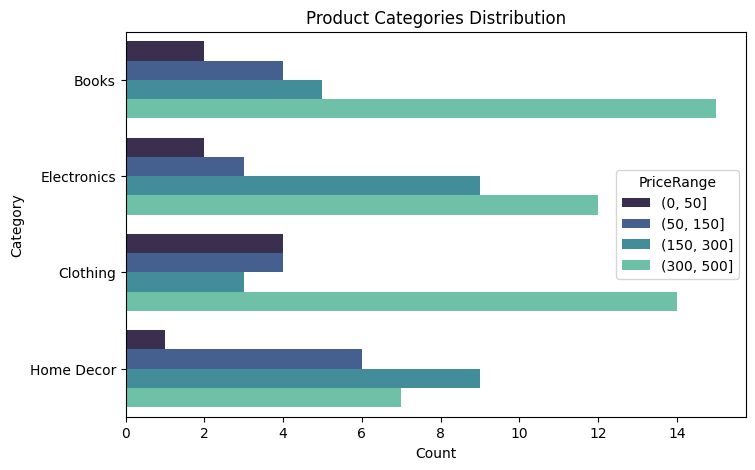

In [15]:
products['PriceRange'] = pd.cut(products['Price'], bins=[0, 50, 150, 300, 500])
plt.figure(figsize=(8, 5))
sns.countplot(data=products, y='Category', palette='mako', hue='PriceRange', order=products['Category'].value_counts().index)
plt.title("Product Categories Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

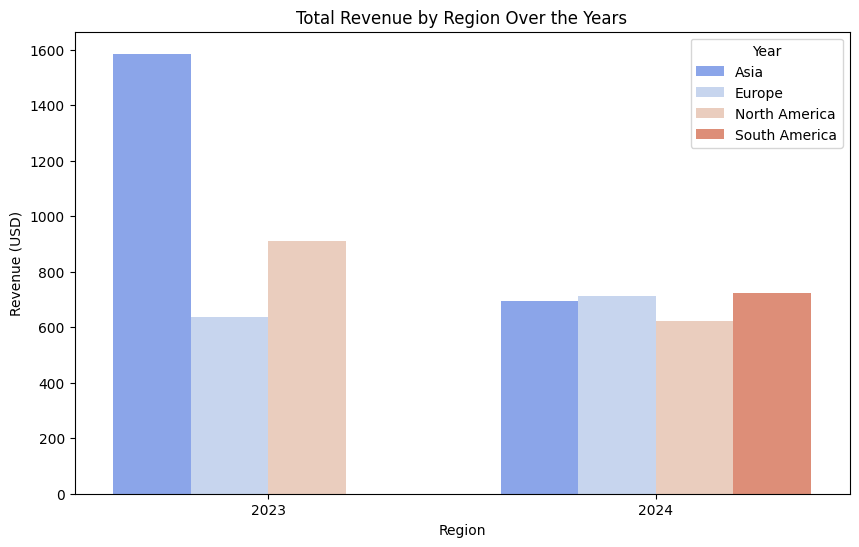

In [25]:
merged_df['Year'] = merged_df['TransactionDate'].dt.year
revenue_by_region_year = merged_df.groupby(['Region', 'Year'])['TotalValue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_region_year, x='Year', y='TotalValue', hue='Region', palette='coolwarm')
plt.title("Total Revenue by Region Over the Years")
plt.ylabel("Revenue (USD)")
plt.xlabel("Region")
plt.legend(title="Year")
plt.show()

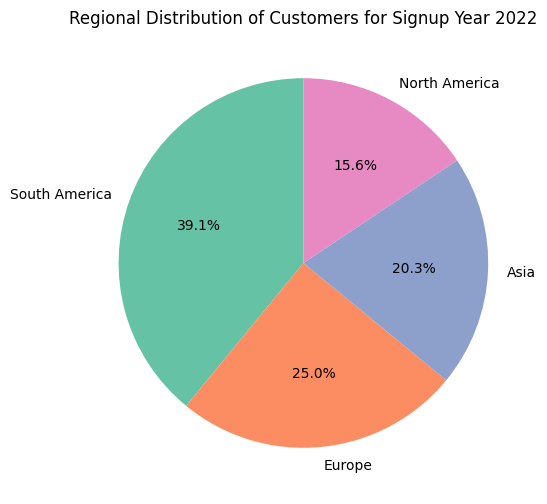

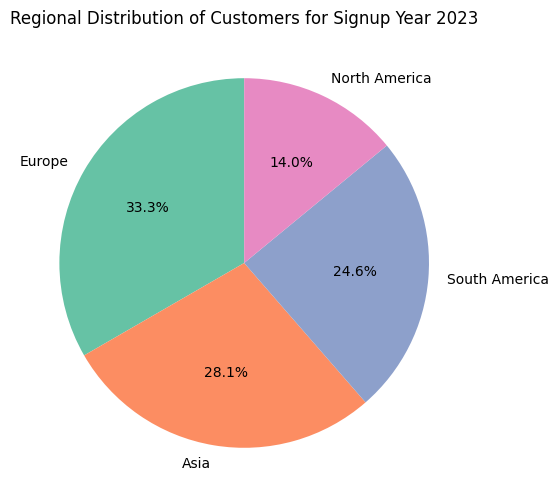

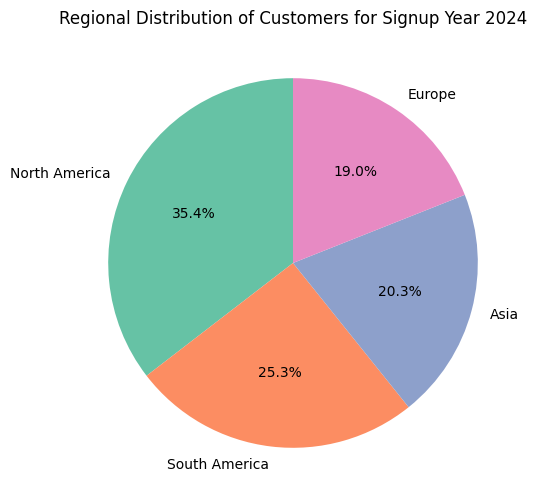

In [30]:
"""region_signup_counts = customers.groupby(['Region', 'SignupYear']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
region_signup_counts_pivot = region_signup_counts.pivot_table(index='Region', columns='SignupYear', values='Count', aggfunc='sum', fill_value=0)
region_signup_counts_pivot.plot(kind='pie', subplots=True, figsize=(10, 6), autopct='%1.1f%%', legend=False)
plt.title("Regional Distribution of Customers for Signup Year")
plt.ylabel("")
plt.show()"""

for year in sorted(customers['SignupYear'].unique()):
    data_year = customers[customers['SignupYear'] == year]
    region_counts = data_year['Region'].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f"Regional Distribution of Customers for Signup Year {year}")
    plt.show()

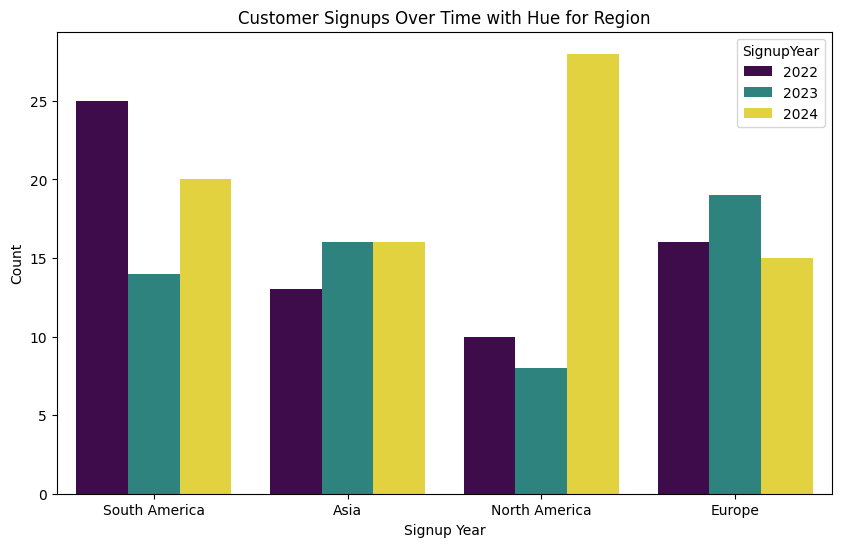

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', hue='SignupYear', palette='viridis')
plt.title("Customer Signups Over Time with Hue for Region")
plt.xlabel("Signup Year")
plt.ylabel("Count")
plt.show()

In [21]:
category_price_stats = products.groupby('Category')['Price'].agg(
    mean_price='mean',
    median_price='median',
    min_price='min',
    max_price='max',
    std_dev='std',
    product_count='count'
).reset_index()

# Display the statistics
print(pd.DataFrame(category_price_stats))

      Category  mean_price  median_price  min_price  max_price     std_dev  \
0        Books  292.212308        337.94      33.59     497.76  153.800135   
1     Clothing  263.720000        303.50      18.82     481.78  157.965038   
2  Electronics  275.353462        282.72      16.08     459.86  137.056612   
3   Home Decor  235.020000        235.58      41.18     454.53  122.236552   

   product_count  
0             26  
1             25  
2             26  
3             23  


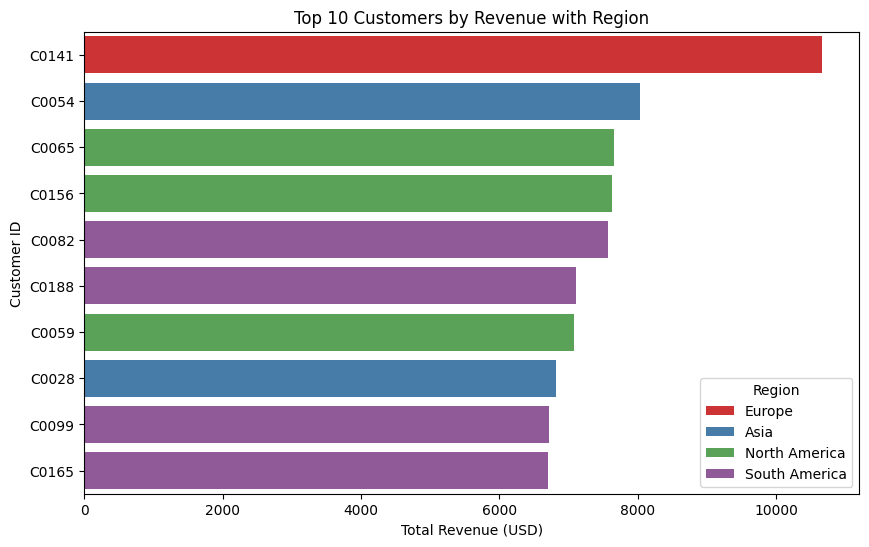

In [23]:
top_customers = merged_df.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()
top_customers = top_customers.sort_values('TotalValue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerID', hue='Region', palette='Set1')
plt.title("Top 10 Customers by Revenue with Region")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer ID")
plt.show()

In [ ]:
merged_data['Year'] = merged_data['TransactionDate'].dt.year

# Group by Year and ProductID to calculate total revenue for each product
product_sales_yearly = merged_data.groupby(['Year', 'ProductID']).agg(
    total_revenue=('TotalValue', 'sum')
).reset_index()

# Merge with product names for readability
product_sales_yearly = pd.merge(product_sales_yearly, products[['ProductID', 'ProductName']], on='ProductID', how='left')

# Identify top products for each year
top_products_per_year = product_sales_yearly.sort_values(['Year', 'total_revenue'], ascending=[True, False]).groupby('Year').head(3)

print(top_products_per_year)